In [11]:
import pandas as pd
import os
from datetime import datetime

SAMPLE_RATE = 32

PARTICIPANTE = 3


ATIVIDADE = 'QD'
MARCHA = 'G'
SEQUENCIA = 10
SENSOR = 'ACC'

HEADER_LINES = 2

print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv') 
print('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv')
print('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv')

Dataset/Participante 3/V3_QD_G_10/ACC.csv
Dataset/Participante 3/V3_QD_G_10/tags.csv
Lifesenior/QD_G_10/V3_QD_G_10.csv


In [12]:
 #read file
 data = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/'+SENSOR+'.csv',index_col=False,header=None)
 data = data.rename(columns={0: 'acc_x', 1: 'acc_y', 2: 'acc_z'})
 init_time_measure = data.iloc[0,0]
 print(data)

 print(init_time_measure)

             acc_x         acc_y         acc_z
0     1.660329e+09  1.660329e+09  1.660329e+09
1     3.200000e+01  3.200000e+01  3.200000e+01
2    -4.200000e+01  2.300000e+01  3.300000e+01
3    -4.000000e+01  2.300000e+01  3.900000e+01
4    -4.200000e+01  1.900000e+01  4.100000e+01
...            ...           ...           ...
1665 -4.400000e+01 -2.500000e+01  3.900000e+01
1666 -5.500000e+01 -3.700000e+01  3.600000e+01
1667 -5.500000e+01 -3.700000e+01  4.500000e+01
1668 -5.000000e+01 -4.100000e+01  4.500000e+01
1669 -5.200000e+01 -4.600000e+01  4.000000e+01

[1670 rows x 3 columns]
1660328866.0


In [13]:
#read tags that inform init and end of activity
tags = pd.read_csv('Dataset/Participante '+str(PARTICIPANTE)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/tags.csv',index_col=False,header=None)
print(tags)
print(tags.shape)

              0
0  1.660329e+09
1  1.660329e+09
(2, 1)


In [14]:
#store init and end activity time
init_activ_time = tags.iloc[0,0]
end_activ_time = tags.iloc[1,0]
print(init_activ_time)

1660328877.22


In [15]:
#calc time to cut in file init
lines_to_cut_init = init_activ_time - init_time_measure
print(lines_to_cut_init)
lines_to_cut_init = int(lines_to_cut_init*SAMPLE_RATE)+HEADER_LINES
print(lines_to_cut_init)

11.22000002861023
361


In [16]:
#calc time to cut in file end
lines_to_cut_end = end_activ_time - init_time_measure
print(lines_to_cut_end)
lines_to_cut_end = int(lines_to_cut_end*SAMPLE_RATE)+HEADER_LINES
print(lines_to_cut_end)

46.38000011444092
1486


In [17]:
#get only samples from init to end tagged activity
formatted_data = data.iloc[lines_to_cut_init:lines_to_cut_end,:]

#transform to real values according to Empatica Calc
formatted_data = (formatted_data.values*2)/128

print(formatted_data)

newdata = pd.DataFrame(formatted_data)
newdata = newdata.rename(columns={0: 'acc_x', 1: 'acc_y', 2: 'acc_z'})

[[-0.328125 -0.15625   0.953125]
 [-0.3125   -0.140625  0.953125]
 [-0.3125   -0.140625  1.      ]
 ...
 [ 0.09375   0.        0.9375  ]
 [ 0.140625  0.015625  0.953125]
 [ 0.140625  0.03125   0.953125]]


In [18]:
print(newdata.shape)

(1125, 3)


In [19]:
print(newdata)

         acc_x     acc_y     acc_z
0    -0.328125 -0.156250  0.953125
1    -0.312500 -0.140625  0.953125
2    -0.312500 -0.140625  1.000000
3    -0.359375 -0.140625  0.937500
4    -0.312500 -0.156250  0.937500
...        ...       ...       ...
1120  0.171875  0.031250  0.953125
1121  0.140625 -0.015625  0.937500
1122  0.093750  0.000000  0.937500
1123  0.140625  0.015625  0.953125
1124  0.140625  0.031250  0.953125

[1125 rows x 3 columns]


<Axes: >

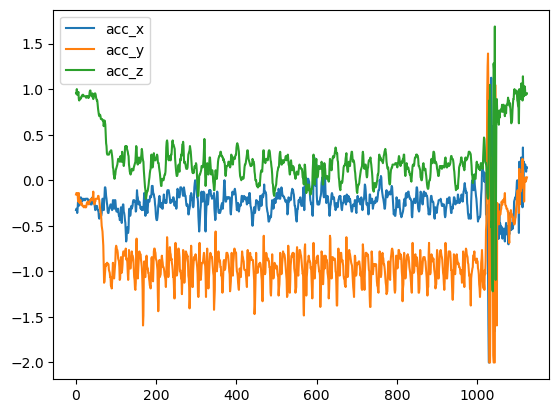

In [20]:
newdata.plot()

In [22]:
#export the file to specific activity
newdata.to_csv('Lifesenior/'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'/V'+str(PARTICIPANTE)+'_'+ATIVIDADE+'_'+MARCHA+'_'+str(SEQUENCIA)+'.csv', index=False)